In [1]:
    import sys
    import numpy as np
    import matplotlib.pyplot as plt
    import tb

    a = tb.Atom('A')
    a.add_orbital('s', -0.7)
    tb.Atom.orbital_sets = {'A': a}
    tb.set_tb_params(PARAMS_A_A={'ss_sigma': -0.5})

    xyz_file = """1
    H cell
    A1       0.0000000000    0.0000000000    0.0000000000                                                                                                      
    """

    h = tb.Hamiltonian(xyz=xyz_file, nn_distance=2.1)
    h.initialize()
    h.set_periodic_bc([[0, 0, 1.0]])
    h_l, h_0, h_r = h.get_coupling_hamiltonians()

    energy = np.linspace(-3.0, 1.5, 700)

    sgf_l = []
    sgf_r = []

    for E in energy:
        L, R, _, _, _ = tb.surface_greens_function(E, h_l, h_0, h_r)
        sgf_l.append(L)
        sgf_r.append(R)

    sgf_l = np.array(sgf_l)
    sgf_r = np.array(sgf_r)

    num_sites = h_0.shape[0]
    gf = np.linalg.pinv(np.multiply.outer(energy, np.identity(num_sites)) - h_0 - sgf_l - sgf_r)

    dos = -np.trace(np.imag(gf), axis1=1, axis2=2)

    tr = np.zeros((energy.shape[0]), dtype=np.complex)

    for j, E in enumerate(energy):
        gf0 = np.matrix(gf[j, :, :])
        gamma_l = 1j * (np.matrix(sgf_l[j, :, :]) - np.matrix(sgf_l[j, :, :]).H)
        gamma_r = 1j * (np.matrix(sgf_r[j, :, :]) - np.matrix(sgf_r[j, :, :]).H)
        tr[j] = np.real(np.trace(gamma_l * gf0 * gamma_r * gf0.H))
        dos[j] = np.real(np.trace(1j * (gf0 - gf0.H)))
   

/home/mk/TB_project/tb_env/lib/python2.7/site-packages/tb/diatomic_matrix_element.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  prefactor = ((0.5 * (1 + N)) ** l) * (((1 - N) / (1 + N)) ** (m1 * 0.5 - m2 * 0.5)) * \
/home/mk/TB_project/tb_env/lib/python2.7/site-packages/tb/diatomic_matrix_element.py:92: RuntimeWarning: divide by zero encountered in double_scalars
  ans += ((-1) ** t) * (((1 - N) / (1 + N)) ** t) / \


('Group velocity is ', matrix([[0.01464839]]), -0.02930096840301993)
('Group velocity is ', matrix([[0.0584953]]), -0.11725913385710134)
('Group velocity is ', matrix([[0.08129046]]), -0.1633058186566907)
('Group velocity is ', matrix([[0.09886265]]), -0.19903684140496367)
('Group velocity is ', matrix([[0.11366073]]), -0.2293261884379872)
('Group velocity is ', matrix([[0.12666102]]), -0.2561127339779861)
('Group velocity is ', matrix([[0.13837114]]), -0.28040233834370254)
('Group velocity is ', matrix([[0.1490951]]), -0.30279604305728636)
('Group velocity is ', matrix([[0.15903289]]), -0.32368856369840987)
('Group velocity is ', matrix([[0.16832363]]), -0.3433540739319208)
('Group velocity is ', matrix([[0.17706915]]), -0.36199250638254754)
('Group velocity is ', matrix([[0.18534665]]), -0.37975534284838364)
('Group velocity is ', matrix([[0.19321635]]), -0.39676069655678214)
('Group velocity is ', matrix([[0.20072631]]), -0.41310225029223563)
('Group velocity is ', matrix([[0.207915

('Group velocity is ', matrix([[0.4997679]]), -1.6012731443233386)
('Group velocity is ', matrix([[0.4996593]]), -1.6077145795988834)
('Group velocity is ', matrix([[0.49953003]]), -1.6141575547680411)
('Group velocity is ', matrix([[0.49938004]]), -1.6206023302197627)
('Group velocity is ', matrix([[0.49920915]]), -1.6270491639187286)
('Group velocity is ', matrix([[0.49901747]]), -1.633498350713124)
('Group velocity is ', matrix([[0.49880501]]), -1.6399501487339037)
('Group velocity is ', matrix([[0.49857157]]), -1.646404832578147)
('Group velocity is ', matrix([[0.49831728]]), -1.6528626489269245)
('Group velocity is ', matrix([[0.49804203]]), -1.6593239153356516)
('Group velocity is ', matrix([[0.4977459]]), -1.6657889206863912)
('Group velocity is ', matrix([[0.4974286]]), -1.6722578701167545)
('Group velocity is ', matrix([[0.49709023]]), -1.6787310921507148)
('Group velocity is ', matrix([[0.49673099]]), -1.685208870039026)
('Group velocity is ', matrix([[0.49635059]]), -1.69169

/home/mk/TB_project/tb_env/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


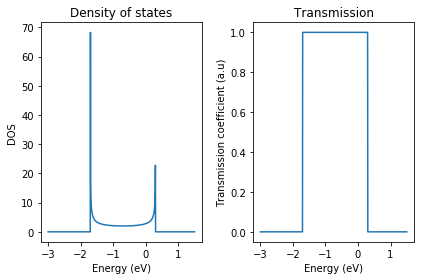

In [2]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(energy, dos)
ax[0].set_xlabel('Energy (eV)')
ax[0].set_ylabel('DOS')
ax[0].set_title('Density of states')

ax[1].plot(energy, tr)
ax[1].set_xlabel('Energy (eV)')
ax[1].set_ylabel('Transmission coefficient (a.u)')
ax[1].set_title('Transmission')
fig.tight_layout()
plt.show()

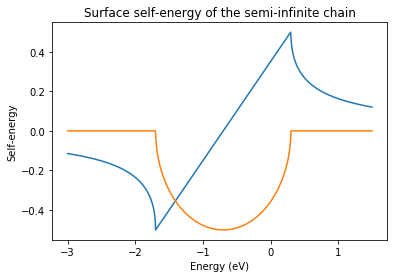

In [3]:
ax = plt.axes()
ax.set_title('Surface self-energy of the semi-infinite chain')
ax.plot(energy, np.real(np.squeeze(sgf_l)))
ax.plot(energy, np.imag(np.squeeze(sgf_l)))
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Self-energy')
plt.show()